# ***********************Sign Language Recognition************************************

In [2]:
import numpy as np 
import pandas as pd
import random as rd

#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image

#for the CNN model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train = pd.read_csv("sign_mnist_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test = pd.read_csv("sign_mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
#summing the number of na in the training set for each column
print(sum(train.isna().sum()))

#summing the number of na in the test set for each column
print(sum(test.isna().sum()))

0
0


In [6]:
#summing the number of null values in the training set for each column
print(sum(train.isnull().sum()))

#summing the number of null values in the test set for each column
print(sum(test.isnull().sum()))

0
0


In [7]:
#creating our Y for the training data
Y_train = train["label"]

#creating our X for the training data
X_train = train.drop(labels = ["label"],axis = 1) 

In [8]:
#creating our Y for the test data
Y_test = test["label"]

#creating our X for the training data
X_test = test.drop(labels = ["label"],axis = 1) 

In [9]:
#converting the range of the pixel data from 0-255 to 0-1
X_train = X_train / 255.0

X_test = X_test / 255.0

In [10]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print(X_train.shape)
print(X_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


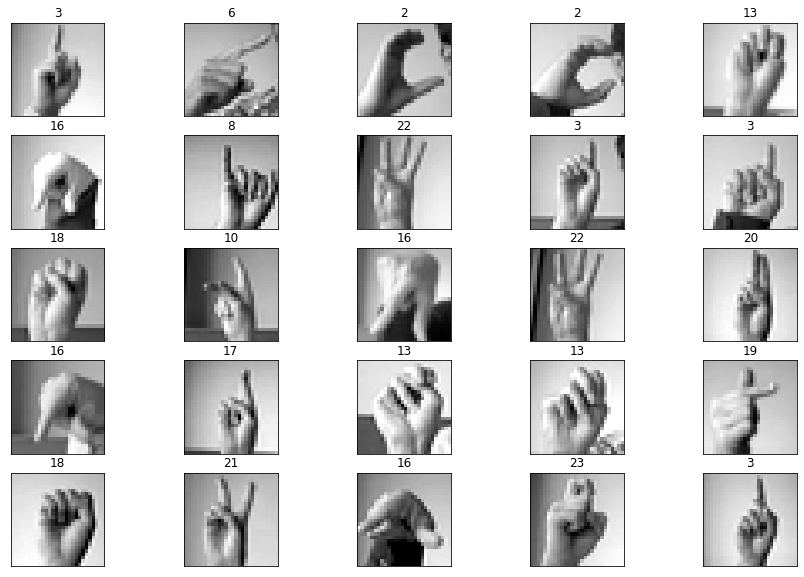

In [12]:
#creating a 5x5 grid of the first 25 photos in the training images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(Y_train[i])
plt.show()

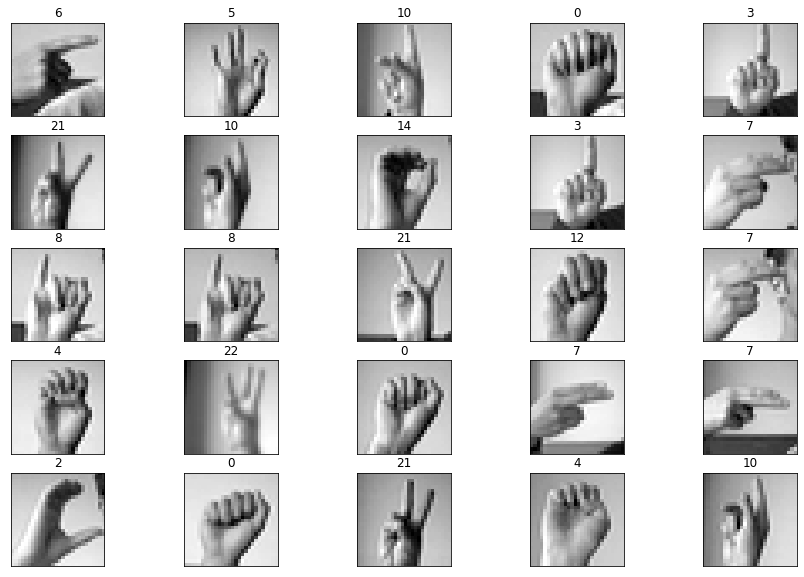

In [13]:
#creating a 5x5 grid of the first 25 photos in the test images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(Y_test[i])
plt.show()

In [14]:
#spliting training images into the images we will use for training the model and validating the model
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state=7)

In [15]:
#showing the shapes of our train, validate, and test images
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(19218, 28, 28, 1)
(19218,)
(8237, 28, 28, 1)
(8237,)
(7172, 28, 28, 1)
(7172,)


In [16]:
#creating our CNN model
model = keras.Sequential([
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax"),
])

In [17]:
#compiling the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
#Training the model
history = model.fit(
    x = X_train,
    y = Y_train,
    validation_data= (X_val,Y_val),
    batch_size = 128,
    epochs=10,
    verbose=2,
)

Epoch 1/10
151/151 - 38s - loss: 0.4198 - accuracy: 0.8510 - val_loss: 0.1457 - val_accuracy: 0.9726 - 38s/epoch - 250ms/step
Epoch 2/10
151/151 - 38s - loss: 0.3478 - accuracy: 0.8760 - val_loss: 0.0969 - val_accuracy: 0.9858 - 38s/epoch - 255ms/step
Epoch 3/10
151/151 - 40s - loss: 0.2837 - accuracy: 0.9014 - val_loss: 0.0640 - val_accuracy: 0.9934 - 40s/epoch - 263ms/step
Epoch 4/10
151/151 - 38s - loss: 0.2421 - accuracy: 0.9178 - val_loss: 0.0390 - val_accuracy: 0.9964 - 38s/epoch - 253ms/step
Epoch 5/10
151/151 - 38s - loss: 0.1991 - accuracy: 0.9314 - val_loss: 0.0312 - val_accuracy: 0.9966 - 38s/epoch - 252ms/step
Epoch 6/10
151/151 - 38s - loss: 0.1692 - accuracy: 0.9431 - val_loss: 0.0207 - val_accuracy: 0.9987 - 38s/epoch - 252ms/step
Epoch 7/10
151/151 - 38s - loss: 0.1446 - accuracy: 0.9520 - val_loss: 0.0134 - val_accuracy: 0.9996 - 38s/epoch - 254ms/step
Epoch 8/10
151/151 - 38s - loss: 0.1320 - accuracy: 0.9558 - val_loss: 0.0094 - val_accuracy: 0.9994 - 38s/epoch - 253

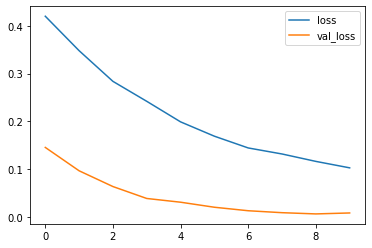

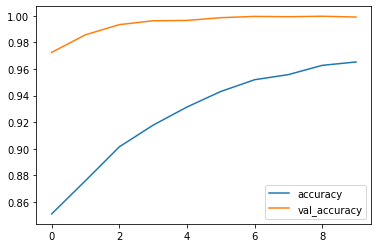

In [20]:
#Viewing the training results
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [21]:
#creating our predictions using the test pixel values
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis = 1)

#creating a report that show how our predictions compare with actual values
print(classification_report(Y_test, predictions))

225/225 [==============================] - 4s 15ms/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      0.99      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       0.94      1.00      0.97       498
           5       1.00      1.00      1.00       247
           6       0.95      0.98      0.96       348
           7       1.00      0.95      0.98       436
           8       1.00      1.00      1.00       288
          10       1.00      1.00      1.00       331
          11       1.00      1.00      1.00       209
          12       0.96      0.96      0.96       394
          13       1.00      0.89      0.94       291
          14       1.00      1.00      1.00       246
          15       0.98      1.00      0.99       347
          16       1.00      1.00      1.00       164
          17       1.00  

In [32]:
print("Accuracy of the model is - " , model.evaluate(X_val,Y_val)[1]*100 , "%")

258/258 [==============================] - 4s 15ms/step - loss: 0.0088 - accuracy: 0.9992
Accuracy of the model is -  99.91501569747925 %
